## Get the Data

Either use the provided .csv file or (optionally) get fresh (the freshest?) data from running an SQL query on StackExchange: 

Follow this link to run the query from [StackExchange](https://data.stackexchange.com/stackoverflow/query/675441/popular-programming-languages-per-over-time-eversql-com) to get your own .csv file

<code>
select dateadd(month, datediff(month, 0, q.CreationDate), 0) m, TagName, count(*)
from PostTags pt
join Posts q on q.Id=pt.PostId
join Tags t on t.Id=pt.TagId
where TagName in ('java','c','c++','python','c#','javascript','assembly','php','perl','ruby','visual basic','swift','r','object-c','scratch','go','swift','delphi')
and q.CreationDate < dateadd(month, datediff(month, 0, getdate()), 0)
group by dateadd(month, datediff(month, 0, q.CreationDate), 0), TagName
order by dateadd(month, datediff(month, 0, q.CreationDate), 0)
</code>

## Import Statements

In [77]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

## Data Exploration

**Challenge**: Read the .csv file and store it in a Pandas dataframe

In [9]:
df = pd.read_csv('QueryResults.csv', names=['DATE', 'LANGUAGE_TAG', 'POSTS'])

**Challenge**: Examine the first 5 rows and the last 5 rows of the of the dataframe

In [10]:
print(df.head())
print(df.tail())

                  DATE LANGUAGE_TAG  POSTS
0                    m      TagName    NaN
1  2008-07-01 00:00:00           c#    3.0
2  2008-08-01 00:00:00     assembly    8.0
3  2008-08-01 00:00:00   javascript  162.0
4  2008-08-01 00:00:00            c   85.0
                     DATE LANGUAGE_TAG   POSTS
1987  2020-07-01 00:00:00            r  5694.0
1988  2020-07-01 00:00:00           go   743.0
1989  2020-07-01 00:00:00         ruby   775.0
1990  2020-07-01 00:00:00         perl   182.0
1991  2020-07-01 00:00:00        swift  3607.0


**Challenge:** Check how many rows and how many columns there are. 
What are the dimensions of the dataframe?

In [11]:
df.shape

(1992, 3)

**Challenge**: Count the number of entries in each column of the dataframe

In [14]:
clean_df = df.dropna()
clean_df.count()

DATE            1991
LANGUAGE_TAG    1991
POSTS           1991
dtype: int64

**Challenge**: Calculate the total number of post per language.
Which Programming language has had the highest total number of posts of all time?

In [27]:
clean_df.groupby(by='LANGUAGE_TAG').sum()

,DATE,POSTS
LANGUAGE_TAG,,
assembly,2008-08-01 00:00:002008-09-01 00:00:002008-10-...,34852.0
c,2008-08-01 00:00:002008-09-01 00:00:002008-10-...,336042.0
c#,2008-07-01 00:00:002008-08-01 00:00:002008-09-...,1423530.0
c++,2008-08-01 00:00:002008-09-01 00:00:002008-10-...,684210.0
delphi,2008-08-01 00:00:002008-09-01 00:00:002008-10-...,46212.0
go,2009-11-01 00:00:002009-12-01 00:00:002010-01-...,47499.0
java,2008-08-01 00:00:002008-09-01 00:00:002008-10-...,1696403.0
javascript,2008-08-01 00:00:002008-09-01 00:00:002008-10-...,2056510.0
perl,2008-08-01 00:00:002008-09-01 00:00:002008-10-...,65286.0


Some languages are older (e.g., C) and other languages are newer (e.g., Swift). The dataset starts in September 2008.

**Challenge**: How many months of data exist per language? Which language had the fewest months with an entry? 


In [28]:
clean_df.groupby(by='LANGUAGE_TAG').count()

,DATE,POSTS
LANGUAGE_TAG,,
assembly,144,144
c,144,144
c#,145,145
c++,144,144
delphi,144,144
go,129,129
java,144,144
javascript,144,144
perl,144,144


## Data Cleaning

Let's fix the date format to make it more readable. We need to use Pandas to change format from a string of "2008-07-01 00:00:00" to a datetime object with the format of "2008-07-01"

In [32]:
pd.to_datetime(clean_df['DATE'])

1      2008-07-01
2      2008-08-01
3      2008-08-01
4      2008-08-01
5      2008-08-01
          ...    
1987   2020-07-01
1988   2020-07-01
1989   2020-07-01
1990   2020-07-01
1991   2020-07-01
Name: DATE, Length: 1991, dtype: datetime64[ns]

## Data Manipulation



In [93]:
pivoted_df = clean_df.pivot(index='DATE', columns='LANGUAGE_TAG', values='POSTS')
reshaped_df = pivoted_df.fillna(0)
reshaped_df


LANGUAGE_TAG,assembly,c,c#,c++,delphi,go,java,javascript,perl,php,python,r,ruby,swift
DATE,,,,,,,,,,,,,,
2008-07-01 00:00:00,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2008-08-01 00:00:00,8.0,85.0,511.0,164.0,14.0,0.0,222.0,162.0,28.0,161.0,124.0,0.0,73.0,0.0
2008-09-01 00:00:00,28.0,321.0,1649.0,755.0,105.0,0.0,1137.0,640.0,131.0,482.0,542.0,6.0,290.0,0.0
2008-10-01 00:00:00,15.0,303.0,1989.0,811.0,112.0,0.0,1153.0,725.0,127.0,617.0,510.0,0.0,249.0,0.0
2008-11-01 00:00:00,17.0,259.0,1730.0,735.0,141.0,0.0,958.0,579.0,97.0,504.0,452.0,1.0,160.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-03-01 00:00:00,317.0,2670.0,8954.0,5107.0,181.0,719.0,13253.0,20483.0,215.0,6672.0,26673.0,5761.0,780.0,3434.0
2020-04-01 00:00:00,406.0,3472.0,10042.0,6820.0,250.0,887.0,15377.0,24634.0,240.0,8060.0,32605.0,7047.0,860.0,4015.0
2020-05-01 00:00:00,386.0,3602.0,9923.0,7063.0,221.0,826.0,14711.0,25196.0,228.0,7917.0,34478.0,6833.0,774.0,4066.0


**Challenge**: What are the dimensions of our new dataframe? How many rows and columns does it have? Print out the column names and print out the first 5 rows of the dataframe.

In [46]:
reshaped_df.shape

(145, 14)

In [47]:
reshaped_df.head()

LANGUAGE_TAG,assembly,c,c#,c++,delphi,go,java,javascript,perl,php,python,r,ruby,swift
DATE,,,,,,,,,,,,,,
2008-07-01 00:00:00,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2008-08-01 00:00:00,8.0,85.0,511.0,164.0,14.0,0.0,222.0,162.0,28.0,161.0,124.0,0.0,73.0,0.0
2008-09-01 00:00:00,28.0,321.0,1649.0,755.0,105.0,0.0,1137.0,640.0,131.0,482.0,542.0,6.0,290.0,0.0
2008-10-01 00:00:00,15.0,303.0,1989.0,811.0,112.0,0.0,1153.0,725.0,127.0,617.0,510.0,0.0,249.0,0.0
2008-11-01 00:00:00,17.0,259.0,1730.0,735.0,141.0,0.0,958.0,579.0,97.0,504.0,452.0,1.0,160.0,0.0


In [39]:
clean_df.count()

DATE            1991
LANGUAGE_TAG    1991
POSTS           1991
dtype: int64

**Challenge**: Count the number of entries per programming language. Why might the number of entries be different? 

In [48]:
reshaped_df.count()

LANGUAGE_TAG
assembly      145
c             145
c#            145
c++           145
delphi        145
go            145
java          145
javascript    145
perl          145
php           145
python        145
r             145
ruby          145
swift         145
dtype: int64

## Data Visualisaton with with Matplotlib


**Challenge**: Use the [matplotlib documentation](https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.pyplot.plot.html#matplotlib.pyplot.plot) to plot a single programming language (e.g., java) on a chart.

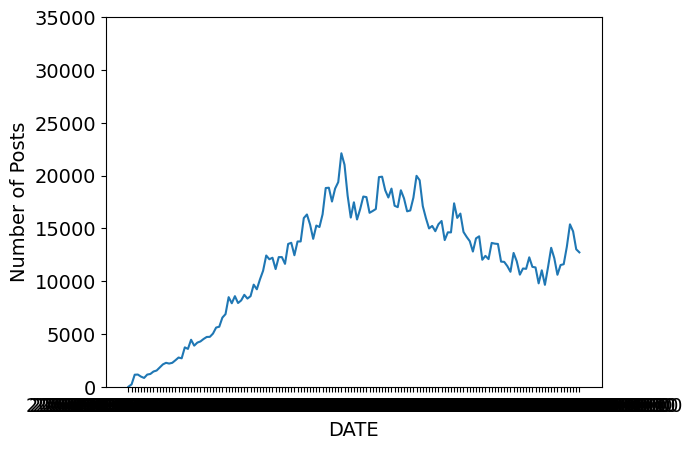

In [94]:
plt.Figure(figsize=(16,10))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('DATE', fontsize=14)
plt.ylabel('Number of Posts', fontsize=14)
plt.ylim(0, 35000)
plt.plot(reshaped_df.index, reshaped_df['java'])

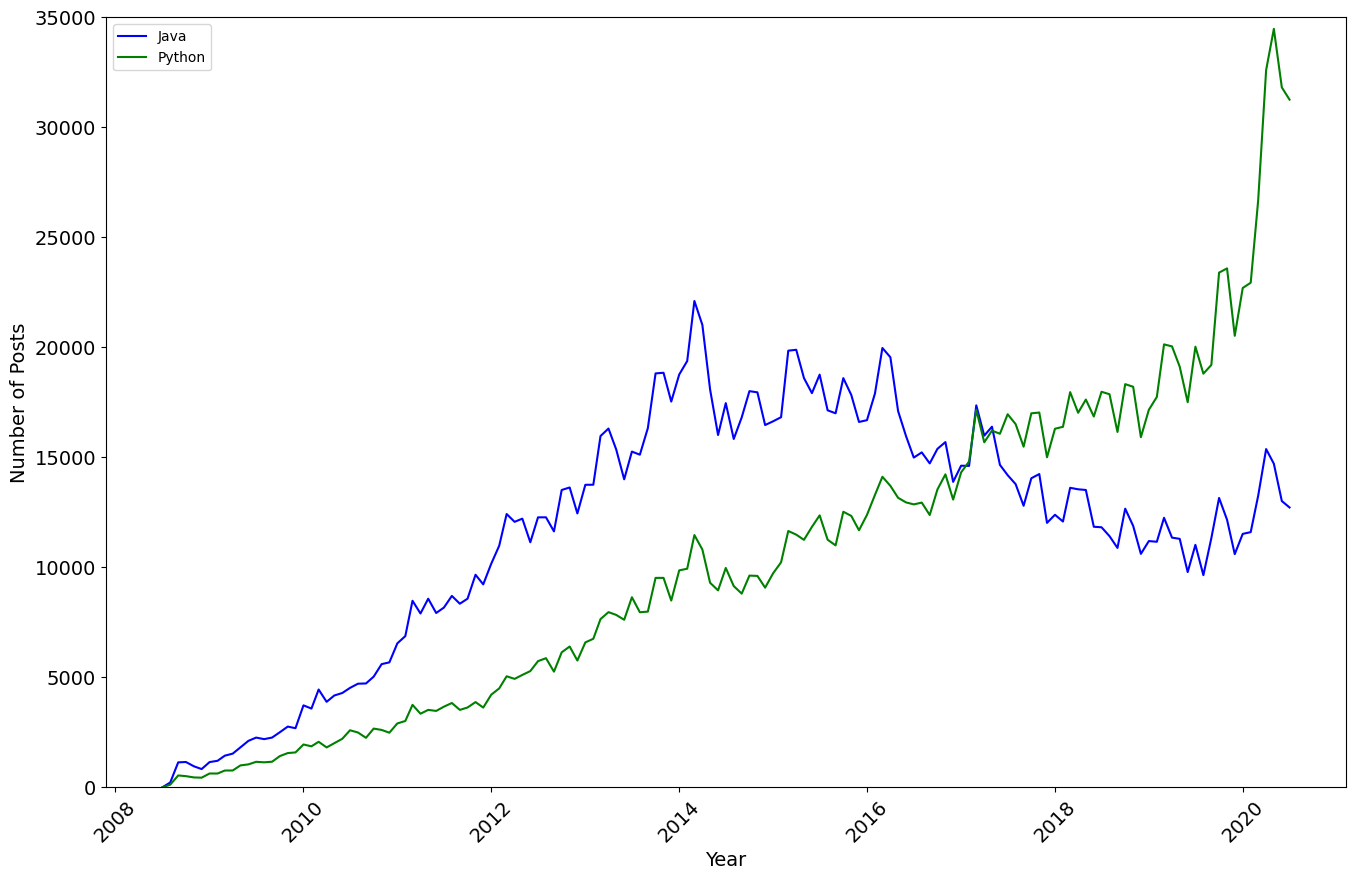

In [88]:

# Assuming reshaped_df is your DataFrame and the 'DATE' column is the index

# Ensure 'DATE' is in datetime format
reshaped_df.index = pd.to_datetime(reshaped_df.index)

# Create the plot
plt.figure(figsize=(16, 10))

# Plotting 'java' and 'python' columns
plt.plot(reshaped_df.index, reshaped_df['java'], label='Java', color='blue')
plt.plot(reshaped_df.index, reshaped_df['python'], label='Python', color='green')

# Customize x and y axis labels and tick sizes
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

# Set labels for x and y axes
plt.xlabel('Year', fontsize=14)
plt.ylabel('Number of Posts', fontsize=14)

# Set y-axis limits
plt.ylim(0, 35000)

# Add a legend to distinguish the languages
plt.legend()

# Set X-axis to show years, with a tick every 2 years
plt.gca().xaxis.set_major_locator(mdates.YearLocator(2))  # Ticks every 2 years
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))  # Format ticks as year only

# Rotate x-ticks for better readability
plt.xticks(rotation=45, fontsize=14)

# Display the plot
plt.show()


**Challenge**: Show two line (e.g. for Java and Python) on the same chart.

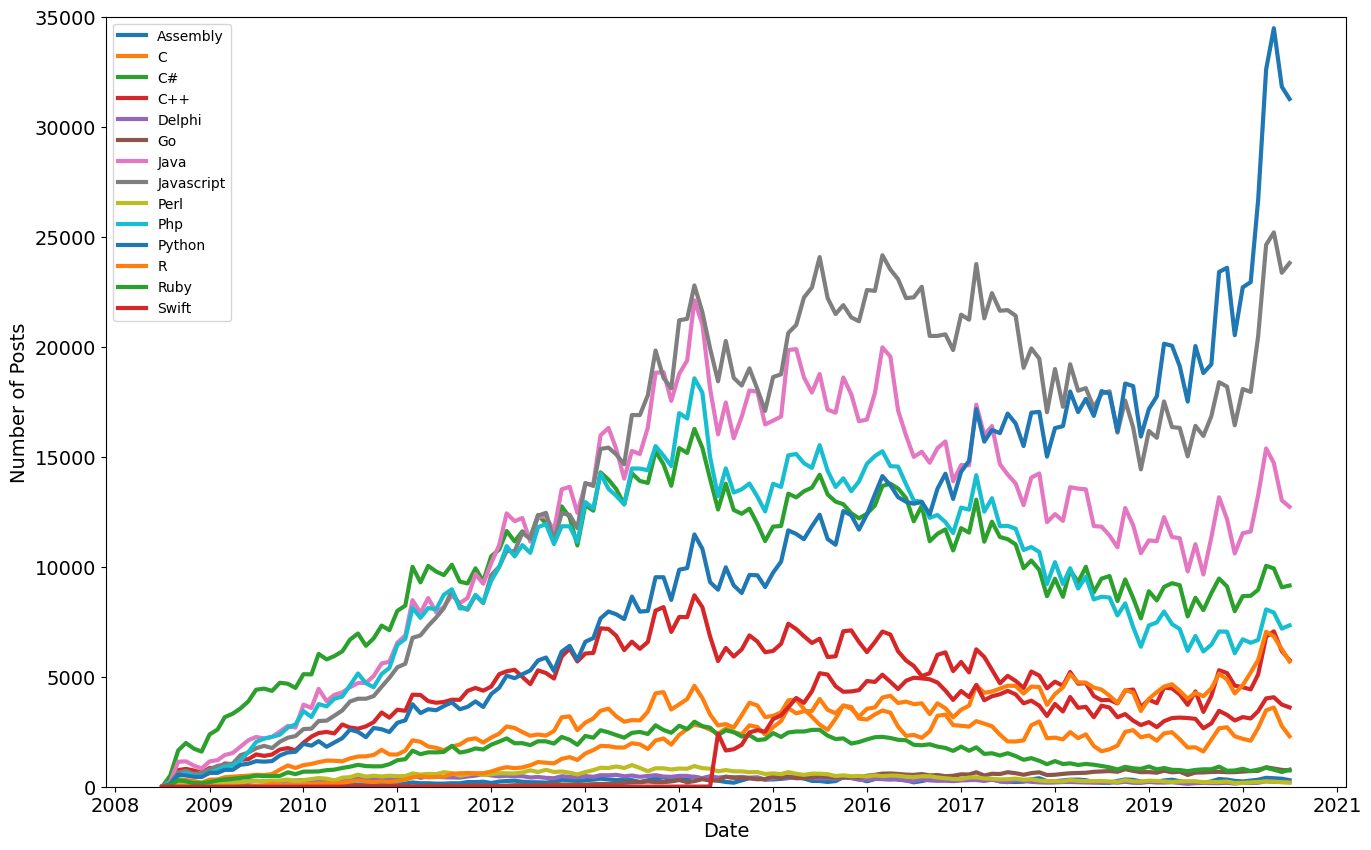

In [113]:
reshaped_df.index = pd.to_datetime(reshaped_df.index)
plt.figure(figsize=(16,10))
plt.xticks(reshaped_df.index, fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Number of Posts', fontsize=14)
for column in reshaped_df.columns:
    plt.plot(reshaped_df.index, reshaped_df[column], label=column.title(), linewidth=3)
plt.ylim(0, 35000)
plt.legend()
plt.gca().xaxis.set_major_locator(mdates.YearLocator(1))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter("%Y"))
plt.show()

# Smoothing out Time Series Data

Time series data can be quite noisy, with a lot of up and down spikes. To better see a trend we can plot an average of, say 6 or 12 observations. This is called the rolling mean. We calculate the average in a window of time and move it forward by one overservation. Pandas has two handy methods already built in to work this out: [rolling()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.rolling.html) and [mean()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.core.window.rolling.Rolling.mean.html). 

In [111]:
reshaped_df.index = pd.to_datetime(reshaped_df.index)
roll_df = reshaped_df.rolling(window=6, min_periods=2).mean()

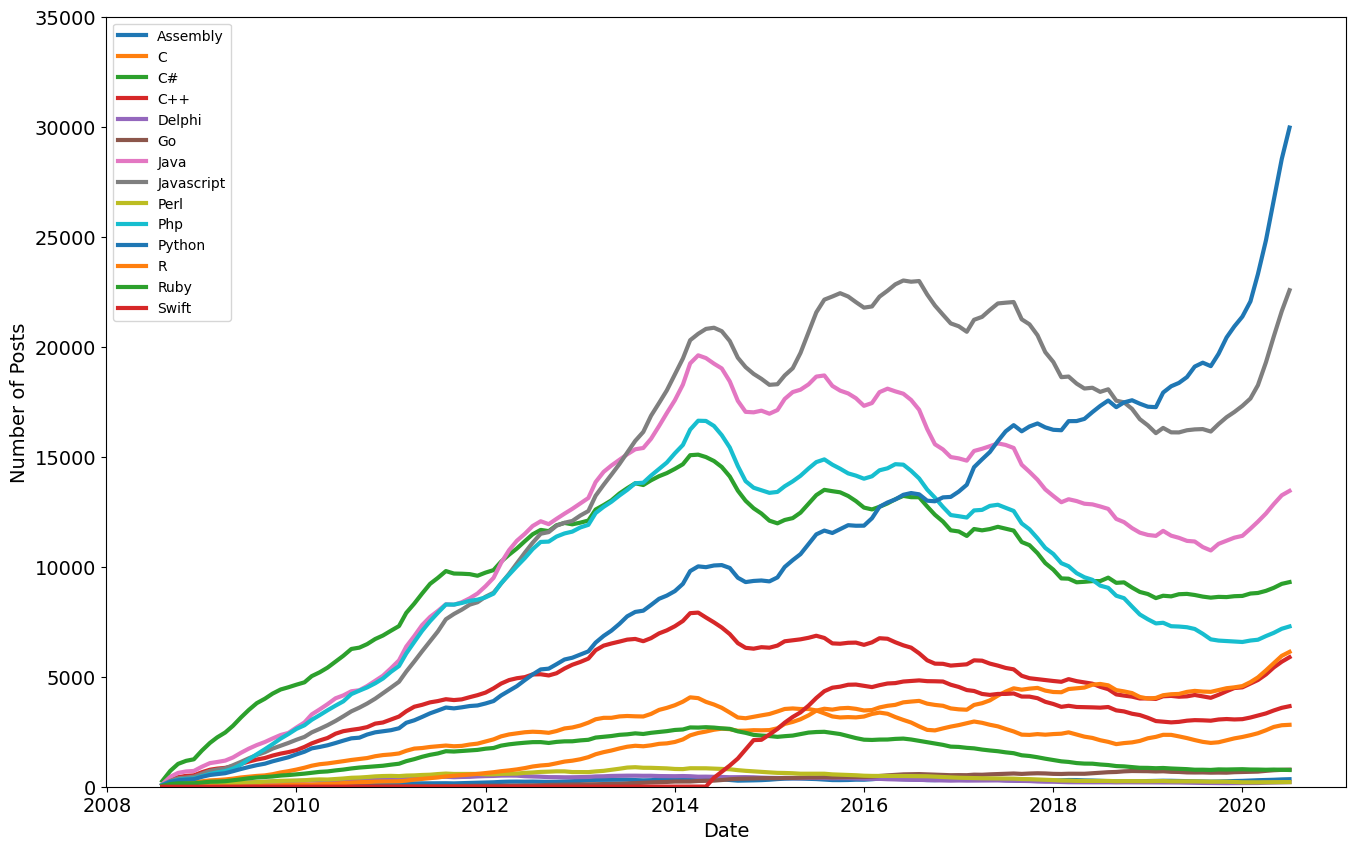

In [112]:
plt.figure(figsize=(16,10))
plt.xticks(roll_df.index, fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Number of Posts', fontsize=14)
for column in roll_df.columns:
    plt.plot(roll_df.index, roll_df[column], label=column.title(), linewidth=3)
plt.ylim(0, 35000)
plt.legend()
plt.gca().xaxis.set_major_locator(mdates.YearLocator(2))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter("%Y"))
plt.show()